# Prepare a prediction model for profit of 50_startups data.

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [4]:
startups_data = pd.read_csv('50_Startups.csv')
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## EDA

In [5]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startups_data.shape

(50, 5)

In [8]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
startups_data= startups_data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startups_data.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
startups_data[startups_data.duplicated()]

,RDS,ADMS,MKTS,State,Profit


## Extracting dependent and independent Variables:

In [11]:
x= startups_data.iloc[:, :-1].values  
y= startups_data.iloc[:, 4].values 

## Data Pre-processing

* As we can see from above 1 column - State having categorical data, hence we need to encode it before fitting it into model. 
* So in order to remove this problem, we will use OneHotEncoder, which will create the dummy variables.

In [12]:
from sklearn.compose import ColumnTransformer        
from sklearn.preprocessing import OneHotEncoder

In [13]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [14]:
x = np.array(ct.fit_transform(x))

In [15]:
x.shape

(50, 6)

## Assumptions check

### 1. Linearity test
1. Scatter Plot
2. lmplot

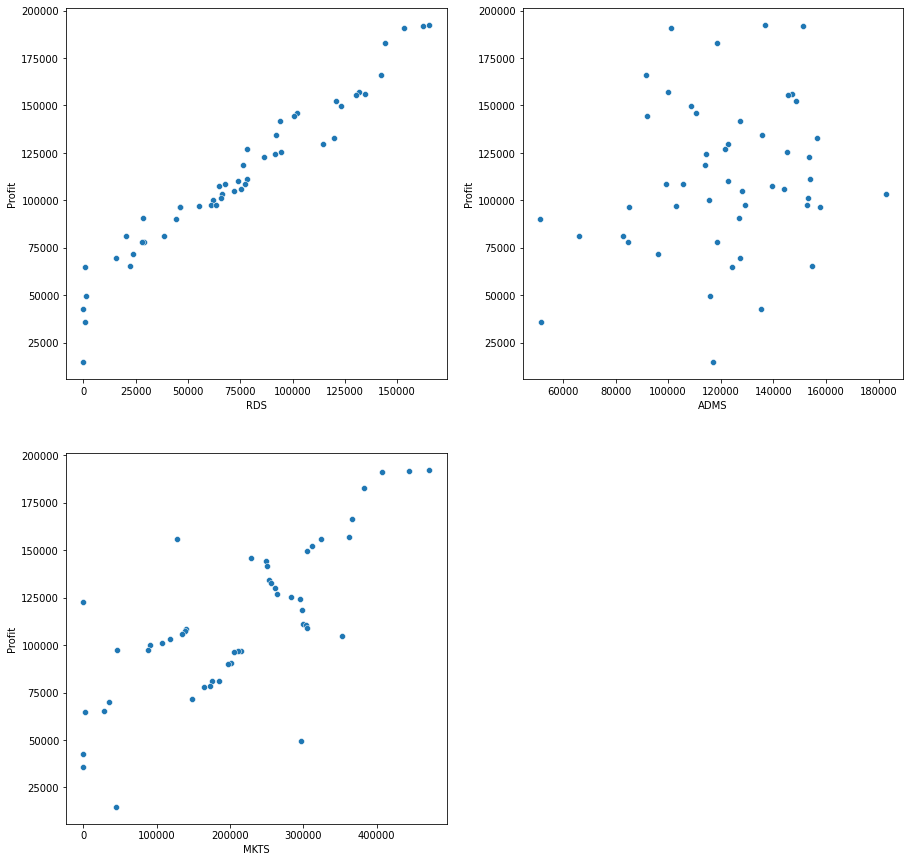

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(x='RDS', y='Profit', data=startups_data)

plt.subplot(2,2,2)
sns.scatterplot(x='ADMS', y='Profit', data=startups_data)

plt.subplot(2,2,3)
sns.scatterplot(x='MKTS', y='Profit', data=startups_data)

plt.show()

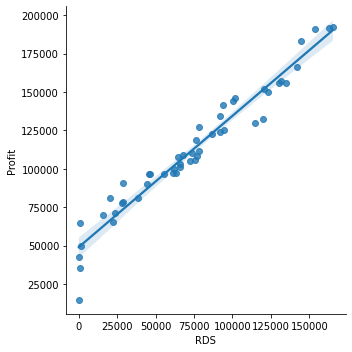

In [17]:
sns.lmplot(x='RDS', y='Profit', data=startups_data)
plt.show()

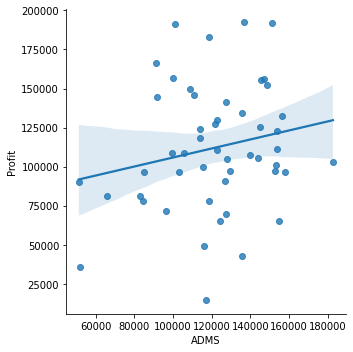

In [18]:
sns.lmplot(x='ADMS', y='Profit', data=startups_data)
plt.show()

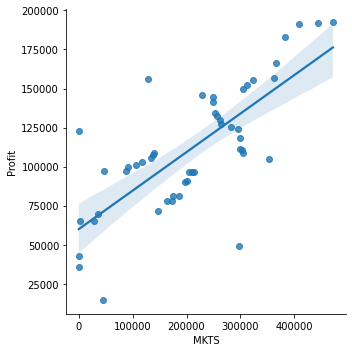

In [19]:
sns.lmplot(x='MKTS', y='Profit', data=startups_data)
plt.show()

#### Linearity test is failed, not all inputs are having the linear relationship with output.

### 2. Normality test 
1. Input features must follow normal distribution
2. Histogram, Distplot test

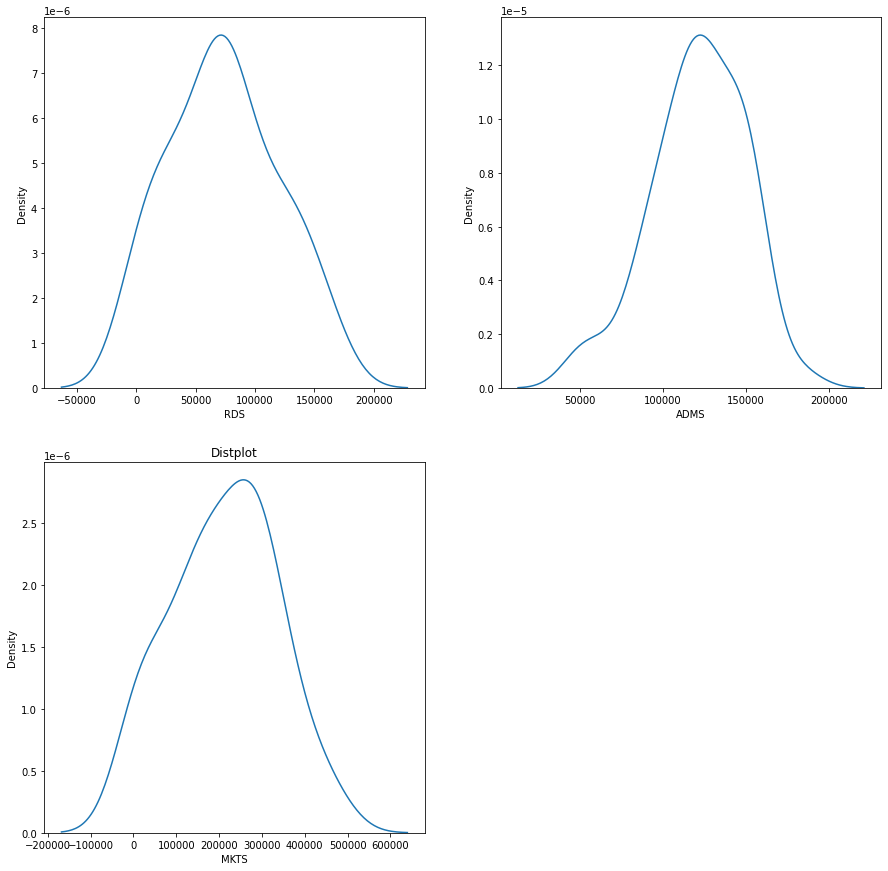

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(startups_data['RDS'], hist=False)

plt.subplot(2,2,2)
sns.distplot(startups_data['ADMS'], hist=False)

plt.subplot(2,2,3)
sns.distplot(startups_data['MKTS'], hist=False)
plt.title('Distplot')
plt.show()

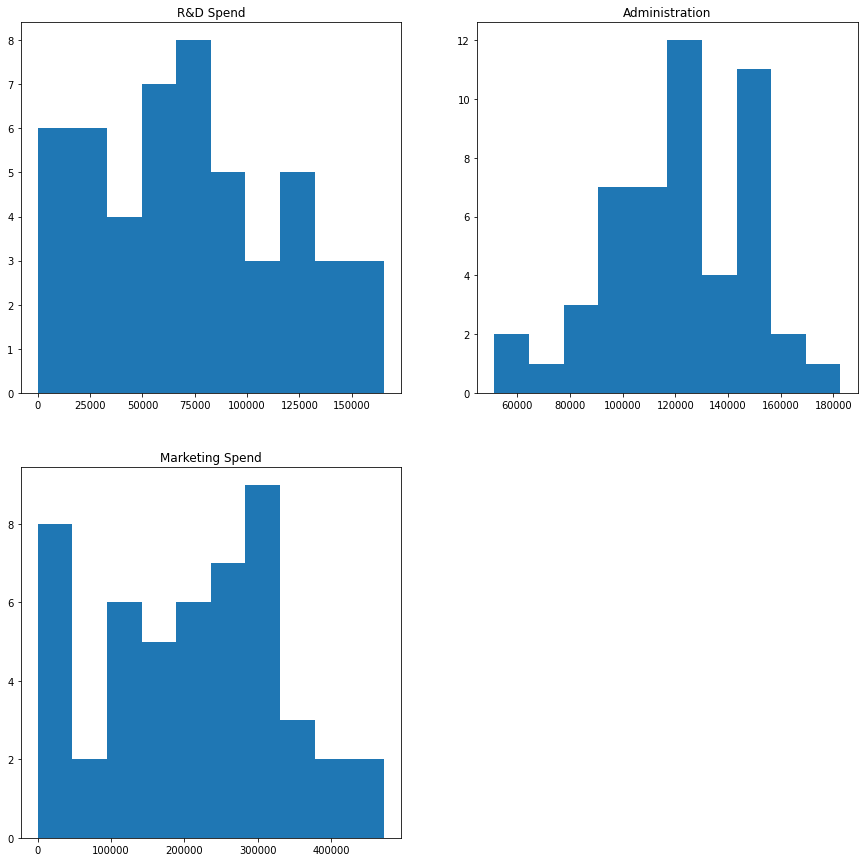

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(startups_data['RDS'])
plt.title('R&D Spend')

plt.subplot(2,2,2)
plt.hist(startups_data['ADMS'])
plt.title('Administration')

plt.subplot(2,2,3)
plt.hist(startups_data['MKTS'])
plt.title('Marketing Spend')
plt.show()

In [22]:
startups_data.skew()

RDS       0.164002
ADMS     -0.489025
MKTS     -0.046472
Profit    0.023291
dtype: float64

In [23]:
startups_data.kurt()

RDS      -0.761465
ADMS      0.225071
MKTS     -0.671701
Profit   -0.063859
dtype: float64

#### From above graph, we can say that input data is fairly symmetrical. Hence, Normality test is passed.

## 3. Multicollinearity Test
1. Correlation Matrix
2. Variance Inflation Factor [VIF]

* We should not use all the dummy variables at the same time, so it must be 1 less than the total number of dummy variables, else it will create a dummy variable trap.
* If we do not remove the first dummy variable, then it may introduce multicollinearity in the model.

In [24]:
x = x[:, 1:]
x.shape

(50, 5)

In [25]:
corr_data = startups_data.corr().round(2)
corr_data

,RDS,ADMS,MKTS,Profit
RDS,1.00,0.24,0.72,0.97
ADMS,0.24,1.00,-0.03,0.20
MKTS,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


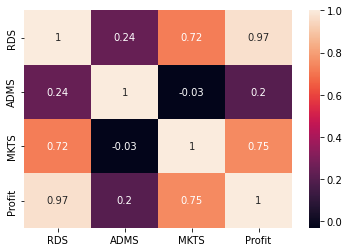

In [26]:
sns.heatmap(corr_data, annot=True)
plt.show()

#### From above correlation plot we can conclude that there is no multicolinearity among the input variables.

## 4. No Autoregression
* As there is no time based inputs in given data

## Model Building

In [27]:
from sklearn.linear_model import LinearRegression  
reg_mod= LinearRegression()  
reg_mod.fit(x, y)  

LinearRegression()

In [28]:
reg_mod.coef_

array([ 1.98788793e+02, -4.18870191e+01,  8.06023114e-01, -2.70043196e-02,
        2.69798610e-02])

In [29]:
reg_mod.intercept_

50125.34383166662

In [30]:
y = pd.DataFrame(y, columns=['Profit'])

In [31]:
y_pred = reg_mod.predict(x)
y_pred = pd.DataFrame(y_pred, columns=['Predict_profit'])

In [32]:
error = y - y_pred

In [33]:
from sklearn import metrics

In [34]:
metrics.r2_score(y,y_pred)

0.9507524843355148

#### Hence, we can finalise the model since the accuracy is good at 95%.

## =================================================